# ✅ Phase 4 — Analyse avancée et interprétation

Ce notebook explore les relations entre températures, émissions de CO₂ et catastrophes naturelles (France vs Inde).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Charger les données
df = pd.read_csv("donnees_climatiques_combinees.csv")

# Afficher les premières lignes
df.head()

,année,pays,anomalie_temp,precipitations_mm,co2_emis,nb_catastrophes
0,1970,France,0.038083,785.6,461.338,3.0
1,1971,France,-0.068083,849.7,494.427,NaN
2,1972,France,-0.298667,839.3,514.988,2.0
3,1973,France,-0.028583,932.1,539.772,4.0
4,1974,France,0.112750,856.1,521.906,1.0


## 🔍 Heatmap de corrélation par pays

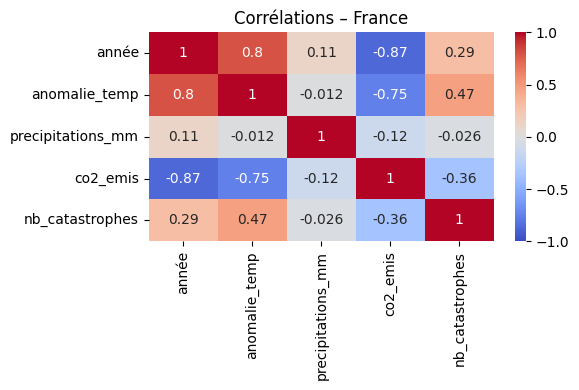

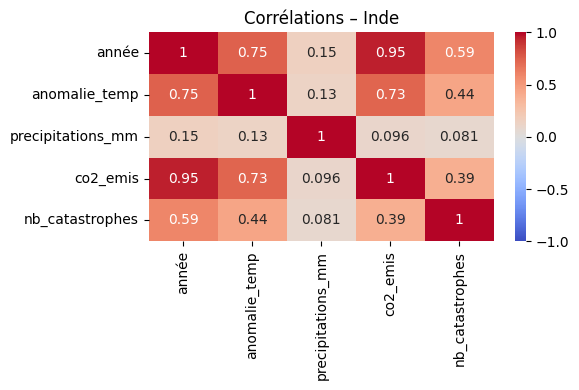

In [2]:
for pays in df['pays'].unique():
    df_p = df[df['pays'] == pays]
    corr = df_p.select_dtypes(include='number').corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Corrélations – {pays}")
    plt.tight_layout()
    plt.show()

## 📈 Régression linéaire (Température ~ CO2)

In [3]:
df_fr = df[df['pays'] == 'France'].copy()
X = sm.add_constant(df_fr[['co2_emis']])
y = df_fr['anomalie_temp']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          anomalie_temp   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     64.06
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.89e-10
Time:                        14:09:23   Log-Likelihood:                -24.989
No. Observations:                  51   AIC:                             53.98
Df Residuals:                      49   BIC:                             57.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6795      0.381      9.669      0.0

## 📊 Régression multiple (Température ~ CO₂ + Précipitations)

In [4]:
X_multi = sm.add_constant(df_fr[['co2_emis', 'precipitations_mm']])
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:          anomalie_temp   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     32.75
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.07e-09
Time:                        14:09:23   Log-Likelihood:                -24.363
No. Observations:                  51   AIC:                             54.73
Df Residuals:                      48   BIC:                             60.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6936      1.00

## 🔁 Granger Causality Test (CO₂ → Température)

In [5]:
# Granger pour France
granger_df = df_fr[['anomalie_temp', 'co2_emis']].dropna()
grangercausalitytests(granger_df, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.8282 , p=0.0008  , df_denom=47, df_num=1
ssr based chi2 test:   chi2=13.6471 , p=0.0002  , df=1
likelihood ratio test: chi2=12.0665 , p=0.0005  , df=1
parameter F test:         F=12.8282 , p=0.0008  , df_denom=47, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5568  , p=0.0159  , df_denom=44, df_num=2
ssr based chi2 test:   chi2=10.1492 , p=0.0063  , df=2
likelihood ratio test: chi2=9.2239  , p=0.0099  , df=2
parameter F test:         F=4.5568  , p=0.0159  , df_denom=44, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2069  , p=0.1018  , df_denom=41, df_num=3
ssr based chi2 test:   chi2=7.7510  , p=0.0514  , df=3
likelihood ratio test: chi2=7.1854  , p=0.0662  , df=3
parameter F test:         F=2.2069  , p=0.1018  , df_denom=41, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7557  , p=0.0114  , df_d

{np.int64(1): ({'ssr_ftest': (np.float64(12.828233963022944),
    np.float64(0.0008070616922502998),
    np.float64(47.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(13.647057407471216),
    np.float64(0.00022058674799996431),
    np.int64(1)),
   'lrtest': (np.float64(12.066504383673049),
    np.float64(0.0005133586728557043),
    np.int64(1)),
   'params_ftest': (np.float64(12.828233963059326),
    np.float64(0.0008070616922380003),
    np.float64(47.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(4.556788426650888),
    np.float64(0.015901452561090858),
    np.float64(44.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(10.149210586631524),
    np.float64(0.006253554272233006),
    np.int64(2)),
   'lrtest': (np.float64(9.223904367107949),
    np.float64(0.009932409482774211),
    np.int64(2)),
   'params_ftest': (np.float64(4.556788426650682),
    np.float64(0.015901452561093574),
    np.float64(44.0),
    2.0)},
   array([[0., 0., 1., 0